In [1]:
import pickle
import numpy as np
import math
import spacy
from nltk import sent_tokenize
from nltk.tokenize.punkt import PunktSentenceTokenizer, PunktParameters
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
corpus = pickle.load(open("corpusTemporal/corpusTemporal.p", 'rb'))

In [3]:
textList = []
for t in corpus['train']['text']:
    textList.append(t)
for t in corpus['valid']['text']:
    textList.append(t)
for t in corpus['test']['text']:
    textList.append(t)

In [4]:
nlp = spacy.load('it_core_news_sm')

numSents = []
numWords = []

textLen = len(textList)
for iDoc,l in enumerate(textList):
    if iDoc%1000==0:
        print("         processed line {}/{}           ".format(iDoc,textLen), end='\r', flush=True)
    sents = list(nlp(l).sents)
    numSents.append(len(sents))
    for s in sents:
        words = str(s).split()
        numWords.append(len(words))
            

In [5]:
numWordsD = []

textLen = len(textList)
for iDoc,l in enumerate(textList):
    if iDoc%1000==0:
        print("         processed line {}/{}           ".format(iDoc,textLen), end='\r', flush=True)
    words = l.split()
    numWordsD.append(len(words))
            

# sent x doc

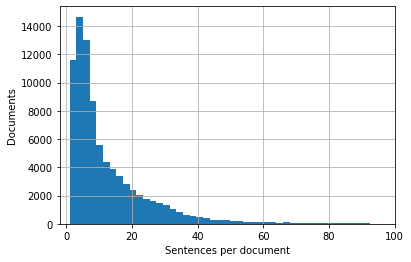

In [6]:
fig = plt.figure()
ax = fig.gca()
#ax.set_yscale('log')
plt.hist(numSents, 225)
plt.grid()
plt.rc('grid', linestyle="--", color='gray')
plt.xlim(left=-2, right=100)
plt.xlabel("Sentences per document")
plt.ylabel("Documents")
plt.savefig("img/sentPerDoc.eps", bbox_inches='tight')
plt.show()

In [9]:
np.average(numSents)

12.957907713983797

# words x sent

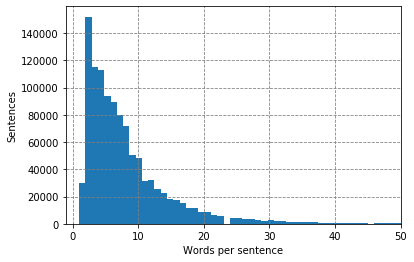

In [7]:
fig = plt.figure()
ax = fig.gca()
#ax.set_yscale('log')
plt.hist(numWords, 305)
plt.xlim(left=-1, right=50)
plt.grid()
plt.rc('grid', linestyle="--", color='gray')
plt.xlabel("Words per sentence")
plt.ylabel("Sentences")
plt.savefig("img/wordPerSent.eps", bbox_inches='tight')
plt.show()

In [10]:
np.average(numWords)

8.077869747423264

# words x doc

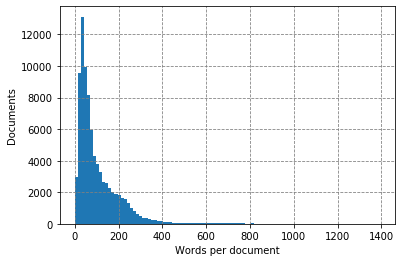

In [8]:
fig = plt.figure()
ax = fig.gca()
plt.hist(numWordsD, 100)
plt.grid()
plt.rc('grid', linestyle="--", color='gray')
plt.xlabel("Words per document")
plt.ylabel("Documents")
plt.savefig("img/wordPerDoc.eps", bbox_inches='tight')
plt.show()

In [11]:
np.average(numWordsD)

104.67218504168135